<a href="https://colab.research.google.com/github/Sid-2862/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression With Keras

Switch from CPU tO GPU

## Data Ingestion

In [29]:
url = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlant.csv"
import pandas as pd
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Perform the basic data quality checks

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [31]:
df.shape

(9568, 5)

In [32]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

### Check for missings data/duplicated row

In [33]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [34]:
df.duplicated().sum()

np.int64(41)

In [35]:
df= df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## Separate x and y featuers

In [36]:
x = df.drop(columns=["PE"])
y = df[["PE"]]

In [37]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [38]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and cleaning

In [39]:
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [40]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [41]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Perform train test split

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.75, random_state=42)

In [43]:
xtrain.head()

,AT,V,AP,RH
9026,1.013134,1.429693,-1.092062,0.502169
7816,-0.519643,0.359980,0.439869,1.271676
9356,0.377723,0.404913,-1.214953,0.812984
6651,-1.035494,-1.002190,0.436502,1.096415
241,0.462355,-0.235969,-0.220040,0.459722


In [44]:
xtest.head(

)

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [45]:
ytrain.head()

,PE
9026,430.32
7816,455.15
9356,444.50
6651,464.57
241,452.17


In [46]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


## Model building with keras

In [47]:
from keras.models import Sequential
from keras.layers import Dense,Input

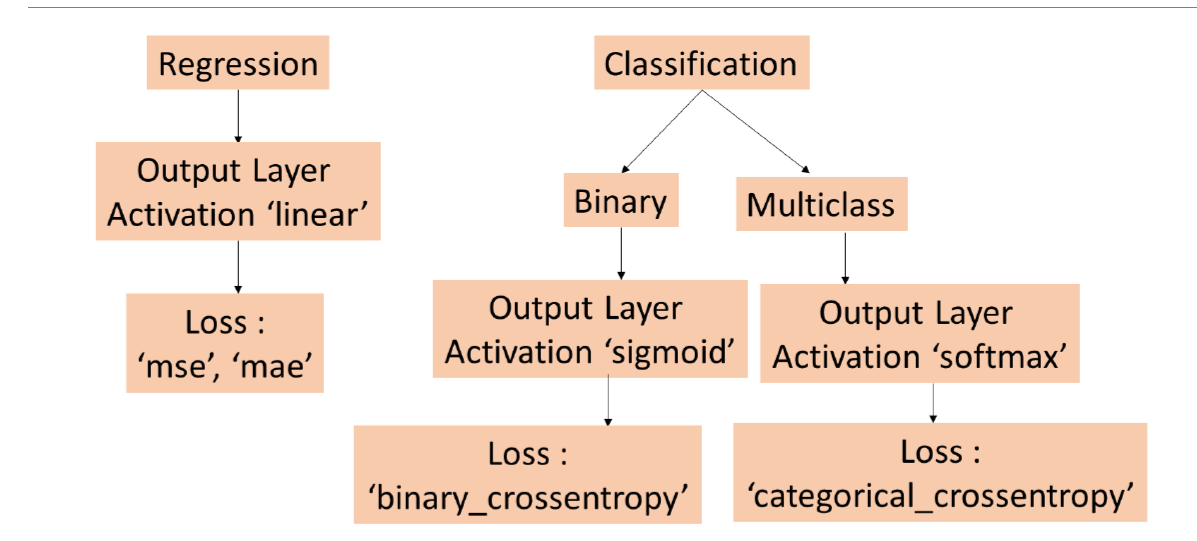

In [48]:
xtrain.shape

(2381, 4)

In [49]:
# column shape/features shape
xtrain.shape[1]

4

In [50]:
# intialize the model
model = Sequential()

# add the input layer by providing features as input
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Dense layer - hidden layer 1
model.add(Dense(units=8,activation="relu"))

# Add another hidden layer 2
model.add(Dense(units=4,activation="relu"))

# Add the output layer
model.add(Dense(units=1,activation="linear"))


In [51]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

## Epoch: one complete pass of forward propagation and backpropagation

In [54]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [55]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 206274.5000 - mae: 453.8530 - val_loss: 205529.6094 - val_mae: 453.0381
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205667.5156 - mae: 453.2021 - val_loss: 204763.4531 - val_mae: 452.2097
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205619.0156 - mae: 453.1430 - val_loss: 203725.1719 - val_mae: 451.0818
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204275.8281 - mae: 451.7090 - val_loss: 202058.3750 - val_mae: 449.2572
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 201660.9062 - mae: 448.8203 - val_loss: 199295.0625 - val_mae: 446.2057
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 198733.3750 - mae: 445.5770 - val_loss: 195211.0469 - val_mae: 441.6454
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 194590.4844 - mae: 440.9521 - val_loss: 189512.1875 - val_mae: 435.1765
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 188443.5938 - mae: 433.

## Learning Curve

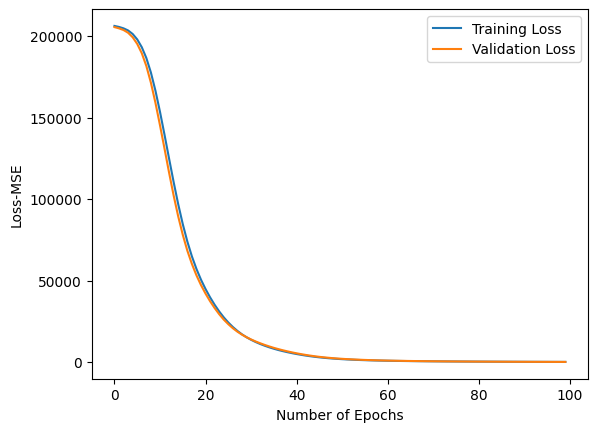

In [56]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss-MSE")
plt.legend()
plt.show()

# Evaluate the model using testing data

In [57]:
ypred_test = model.predict(xtest)
ypred_test

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[443.02722],
       [478.94135],
       [485.47186],
       ...,
       [445.31964],
       [450.21158],
       [444.14795]], dtype=float32)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [59]:


def evaluate_model(model,xdata,ydata):
  ypred=model.predict(xdata)

  MSE = mean_squared_error(ydata,ypred)
  MAE = mean_absolute_error(ydata,ypred)
  R2 = r2_score(ydata,ypred)

  print(f"MSE: {MSE}")
  print(f"MAE:{MAE}")
  print(f"R2-score: {R2}")

In [60]:
evaluate_model(model,xtrain,ytrain)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE: 126.37316131591797
MAE:8.532418251037598
R2-score: 0.5691713094711304


In [61]:
evaluate_model(model,xtest,ytest)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE: 135.19790649414062
MAE:8.778402328491211
R2-score: 0.5325050354003906


## Save the model

In [62]:


model.save("PowerplantPredictions.keras")


## Above model provides ~93% r2 score in test data. Let's consider this model for final predictions

## Load the keras models

In [63]:
from keras.models import load_model

In [64]:
m = load_model("/content/PowerplantPredictions.keras")

In [65]:
m.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [66]:


url2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew = pd.read_csv(url2)
xnew


,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [67]:


xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [68]:

PE_preds = m.predict(xnew_pre)
PE_preds = PE_preds.round(2)
PE_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


array([[448.57],
       [522.44],
       [448.54]], dtype=float32)

## Save the data to dataframe and then save the results to csv file

In [69]:

xnew["PE Predicted"] = PE_preds

In [70]:


xnew["PE Predicted"] = xnew["PE Predicted"].round(2)
xnew

,AT,V,AP,RH,PE Predicted
0,25,51.5,1000.1,57.0,448.570007
1,32,41.0,1051.1,80.0,522.440002
2,28,NaN,1010.2,NaN,448.540009
